### Import Necessary Libraries

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
import warnings
import math

#### Global Settings

In [36]:
warnings.filterwarnings('ignore')
rcParams['figure.figsize'] = 12, 6
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

### Loading data and data familiarity

In [37]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [38]:
data_info = f"train dataframe shape: {df_train.shape} \ntest dataframe shape: {df_test.shape}"
print(data_info)

train dataframe shape: (1460, 81) 
test dataframe shape: (1459, 80)


In [39]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [40]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.000,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.000,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.000,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


#### Droping un-useful columns

In [41]:
df_train.drop('Id' , inplace = True, axis = 1)

#### Correlation Analysis

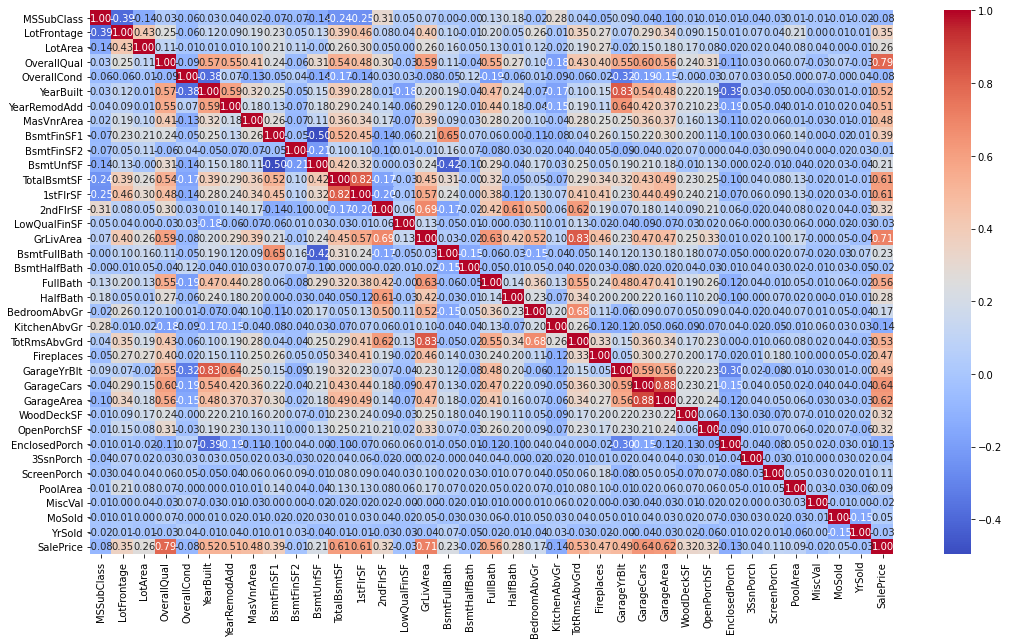

In [42]:
correlation_matrix = df_train.corr(method = "pearson")

plt.figure(figsize = (18, 10))
sns.heatmap(correlation_matrix, cmap = 'coolwarm', annot = True, fmt = '.2f')
plt.show()

#### Features with correlation above 50

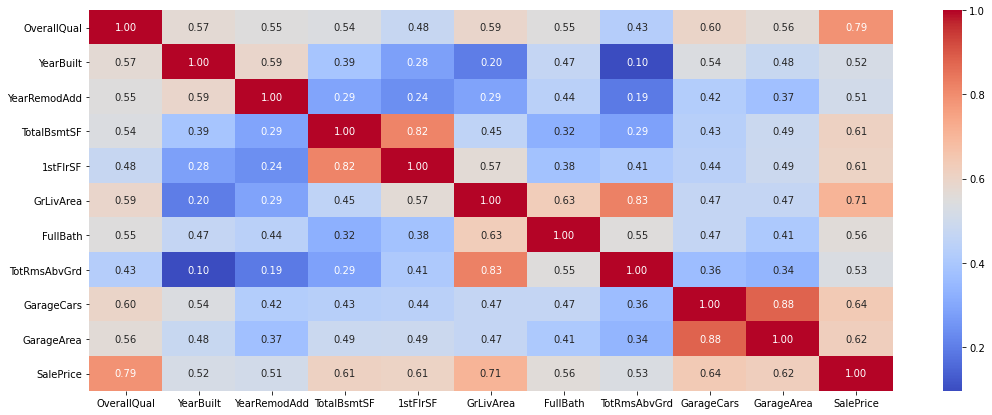

In [43]:
top_twenty = correlation_matrix.index[abs(correlation_matrix['SalePrice']) >= 0.5]

plt.figure(figsize = (18, 7))
sns.heatmap(df_train[top_twenty].corr(), cmap = 'coolwarm', annot = True, fmt = '.2f')
plt.show()

#### Multicollinearlity Analysis

Multicollinearity refers to a situation in which more than two explanatory variables in a multiple regression model are highly linearly related. Below are few of the multicollinear features based on correlation matrix.

In [44]:
# function to plot scatter plots in a grid
def scatter_plot_grid(features_list, dataframe):
    nrows = math.ceil(len(features_list)/ 2)
    ncols = 2
    row = 0
    col = 0

    fig, axes = plt.subplots(nrows = nrows, ncols = ncols, figsize = (12, 23))

    for i, _ in enumerate(range(len(features_list))):
        sns.regplot(ax = axes[row, col], x =top_twenty[i], y = 'SalePrice', data = dataframe)
        col += 1
        if col == 2:
            row += 1
            col = 0
            continue
        
    

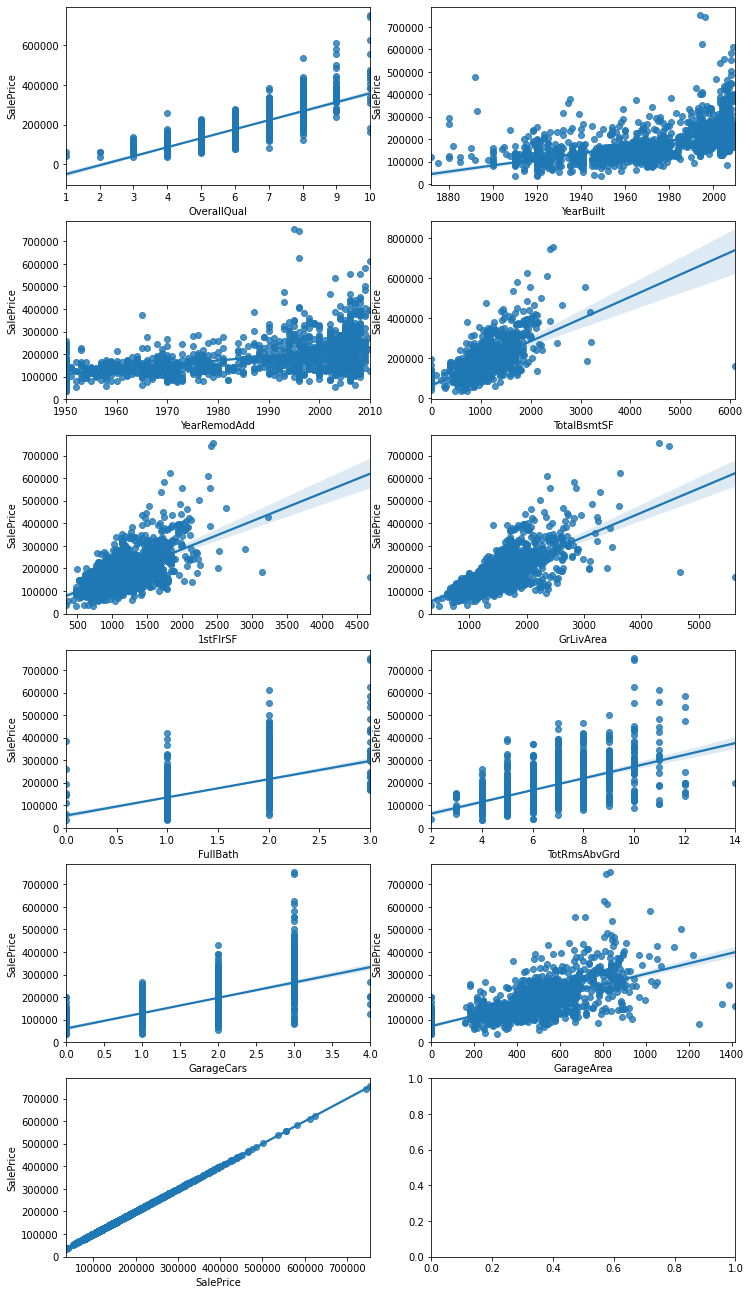

In [45]:
scatter_plot_grid(top_twenty, df_train)

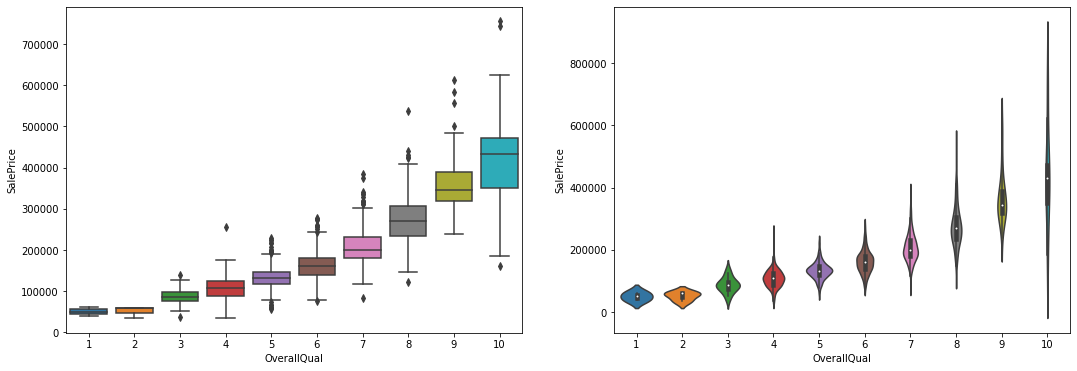

In [46]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 6))
sns.boxplot(ax = axes[0], x = 'OverallQual', y = 'SalePrice', data = df_train)
sns.violinplot(ax = axes[1], x = 'OverallQual', y = "SalePrice", data = df_train)
plt.show()

#### Outlier Removal

0
Shape of train data= (1460, 80)
Shape of train data= (1460, 80)
1
Shape of train data= (1460, 80)
Shape of train data= (1458, 80)
0
Shape of train data= (1458, 80)
Shape of train data= (1454, 80)
1
Shape of train data= (1454, 80)
Shape of train data= (1452, 80)
0
Shape of train data= (1452, 80)
Shape of train data= (1452, 80)
1
Shape of train data= (1452, 80)
Shape of train data= (1449, 80)
0
Shape of train data= (1449, 80)
Shape of train data= (1449, 80)
1
Shape of train data= (1449, 80)
Shape of train data= (1447, 80)
0
Shape of train data= (1447, 80)
Shape of train data= (1445, 80)
1
Shape of train data= (1445, 80)
Shape of train data= (1443, 80)
0
Shape of train data= (1443, 80)
Shape of train data= (1441, 80)
1
Shape of train data= (1441, 80)
Shape of train data= (1439, 80)
0
Shape of train data= (1439, 80)
Shape of train data= (1435, 80)
1
Shape of train data= (1435, 80)
Shape of train data= (1433, 80)
0
Shape of train data= (1433, 80)
Shape of train data= (1431, 80)
1
Shape of

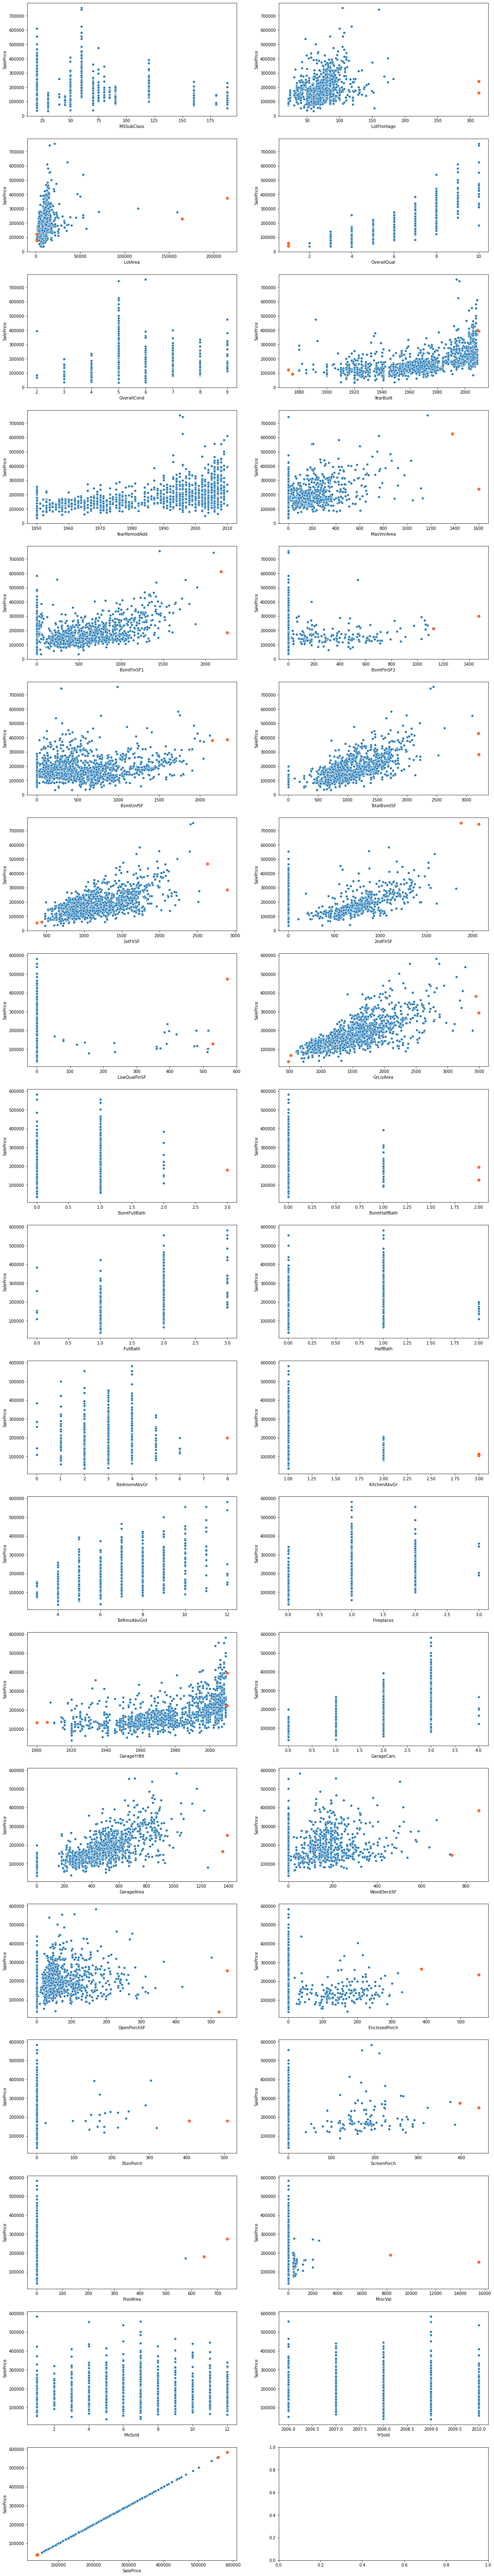

In [47]:
outliers = []
row = 0
col = 0
numeric_features = df_train.select_dtypes(include = ['int64', 'float64']).columns

nrows = math.ceil(len(numeric_features)/ 2)
ncols = 2
    
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, figsize = (20, nrows * 6))

for feature in numeric_features:
    print(col)
    if col == 'YrSold':
        continue
        
    min_threshold = df_train[feature].quantile(0.001)
    max_threshold = df_train[feature].quantile(0.999)
    df_outliers = df_train[(df_train[feature] < min_threshold) | \
                              (df_train[feature] > max_threshold)]
    
    outliers = df_outliers.index.tolist()
#     print(outliers)
    
    sns.scatterplot(ax = axes [row, col], x = feature, y = "SalePrice", data = df_train)
    sns.scatterplot(ax = axes [row, col], x = feature, y = "SalePrice", data = df_outliers, edgecolor ="red")
                    

   # drop outliers from original dataset

    print(f'Shape of train data= {df_train.shape}')
    unique_outliers= list(set(outliers))
    df_train = df_train.drop(unique_outliers)
    df_train.reset_index(drop = True, inplace = True)
    print(f'Shape of train data= {df_train.shape}')
#     clear list afterwards
    outliers.clear()
                    
    
    col += 1
    if col == 2:
            row += 1
            col = 0
            continue
    


In [48]:
df_train.shape

(1397, 80)

## Data Preprocessing

- So far we have good insights into our data and we understand the correlation between features and the target variables.

- In this step we are going to drop unuseful features, identify null values, fix the datatypes of the features and we will also group the features based on the data they contain.

- Since we have test data also available we will combine train and test sets, preprocess, and divide them again.

#### Delete unusefull Features

- Before we start imputing missing values, lets first delete the unusefull features from the dataset.

- 'Utilities' feature contains almost all the values of one type of utility only. Since it wont be usefull in modeling we can drop this feature.

- 'Street' feature also contains the unbalance data of type of road access to property. We can drop it.

- 'PoolQC' most of the data is missing for this feature, we can drop it.

In [49]:
for col in df_train.select_dtypes(include = ['object']):
    print(f"============================{col}===============================")
    print(df_train[col].value_counts())

============================MSZoning===============================
RL         1108
RM          204
FV           64
RH           15
C (all)       6
Name: MSZoning, dtype: int64
============================Street===============================
Pave    1392
Grvl       5
Name: Street, dtype: int64
============================Alley===============================
Grvl    48
Pave    36
Name: Alley, dtype: int64
============================LotShape===============================
Reg    892
IR1    458
IR2     39
IR3      8
Name: LotShape, dtype: int64
============================LandContour===============================
Lvl    1260
Bnk      59
HLS      48
Low      30
Name: LandContour, dtype: int64
============================Utilities===============================
AllPub    1396
NoSeWa       1
Name: Utilities, dtype: int64
============================LotConfig===============================
Inside     1005
Corner      251
CulDSac      90
FR2          47
FR3           4
Name: LotConfig, dtyp

In [50]:
df_train['Utilities'].value_counts()

AllPub    1396
NoSeWa       1
Name: Utilities, dtype: int64

In [51]:
df_train['Street'].value_counts()

Pave    1392
Grvl       5
Name: Street, dtype: int64

In [52]:
df_train['PoolQC'].value_counts()

Gd    1
Name: PoolQC, dtype: int64

Since most of these features are ubalanced and some having no value, we can drop them

In [53]:
df_train = df_train.drop(['Utilities', 'Street', 'PoolQC',], axis=1)
print('Shape of all_data= {}'.format(df_train.shape))

Shape of all_data= (1397, 77)


- MSSubClass: Identifies the type of dwelling involved in the sale. Its data type is int64 and values are incremental order starting from 20 upto 190. If we keep it as it is then our model may give more importance to MSSubClass 190 houses over MSSubClass 20 houese. In order to avoid that we will change its data type to 'str' and treat this as categorical variable.

- YrSold: Contains year values like 2008, 2007, 2006, 2009, 2010. Since we have sufficient data for each value we will change its data type to 'str' and treat this as categorical variable.

- MoSold: Since we have sufficient data for each value we will change its data type to 'str' and treat this as categorical variable.

- We are not changing the data type of 'YearBuilt', 'YearRemodAdd' and 'GarageYrBlt' to 'str'. They have linear relationship with SalePrice, model will benefit from this relationship instaed of converting it into categories. (Also we dont have sufficient training examples for each unique value)

In [56]:
for col in ('MSSubClass', 'YrSold', 'MoSold'):
    df_train[col] = df_train[col].astype(str)

#### Checking For Messing Values

In [68]:
null_cols = df_train.columns[df_train.isna().any()]
null_cols_cnt = df_train[null_cols].isna().sum()
null_cols_percentages = (null_cols_cnt / len(df_train)) *100
null_info_df = pd.DataFrame({"Null value Count" : null_cols_cnt, "Null value %" : null_cols_percentages},
                           index = null_cols)
null_info_df = null_info_df.sort_values(by = "Null value %", ascending = False)

In [69]:
null_info_df

,Null value Count,Null value %
MiscFeature,1349,96.564
Alley,1313,93.987
Fence,1131,80.959
FireplaceQu,668,47.817
LotFrontage,247,17.681
GarageType,70,5.011
GarageYrBlt,70,5.011
GarageFinish,70,5.011
GarageQual,70,5.011
GarageCond,70,5.011


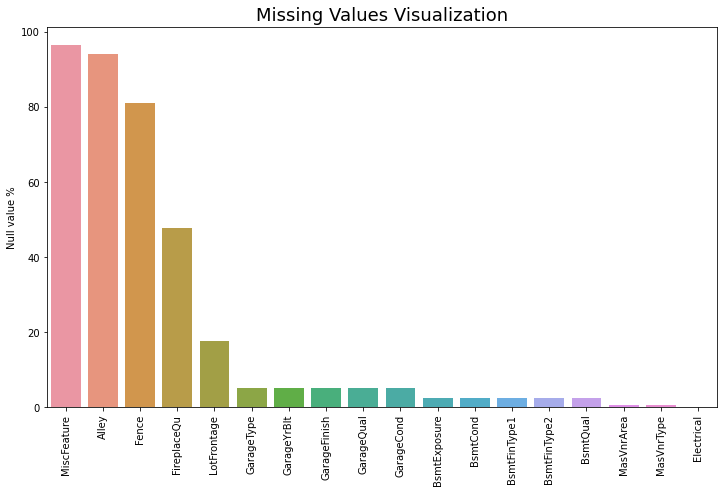

In [75]:
plt.figure(figsize = (12, 7))
sns.barplot(x = null_info_df.index, y = null_info_df["Null value %"])
plt.xticks(rotation = 90)
plt.title("Missing Values Visualization", fontsize = 18)
plt.show()

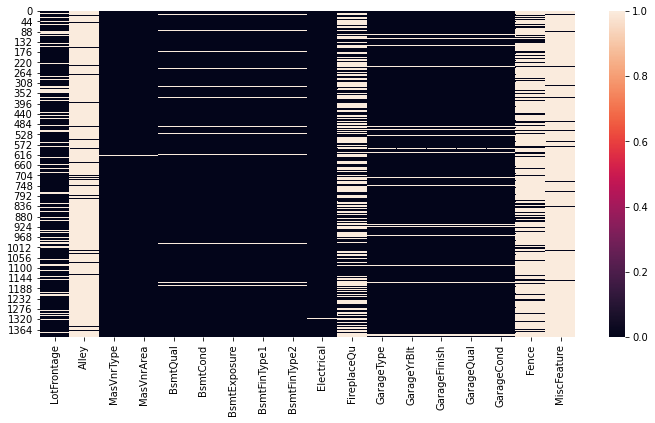

In [77]:
sns.heatmap(df_train[null_cols].isnull())
plt.show()

#### Imputing Missing Values

- We will replace the categorical ordinal as well as nominal features missing values with 'None'
- In case of nominal feature it will become one of the category and in case of ordinal feature it will be trated as least order value.
- Always try to use 'None' if null value percentage is higher, to avoid the imbalance data.

In [81]:
for col in df_train.select_dtypes(include = ["object", "category"]):
    df_train[col] = df_train[col].fillna("None")
    print("="*60)
    print(f"{col} : Null count: {df_train[col].isnull().sum()} Unique values: {df_train[col].unique()}")

MSSubClass : Null count: 0 Unique values: ['60' '20' '70' '50' '190' '45' '90' '120' '85' '80' '160' '75' '30' '180'
 '40']
MSZoning : Null count: 0 Unique values: ['RL' 'RM' 'FV' 'C (all)' 'RH']
Alley : Null count: 0 Unique values: ['None' 'Grvl' 'Pave']
LotShape : Null count: 0 Unique values: ['Reg' 'IR1' 'IR2' 'IR3']
LandContour : Null count: 0 Unique values: ['Lvl' 'Bnk' 'HLS' 'Low']
LotConfig : Null count: 0 Unique values: ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope : Null count: 0 Unique values: ['Gtl' 'Mod' 'Sev']
Neighborhood : Null count: 0 Unique values: ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 : Null count: 0 Unique values: ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 : Null count: 0 Unique values: ['Norm' 'Artery' 'Feedr

- **LotFrontage**: Linear feet of street connected to property. Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood, we can fill in missing values by the median LotFrontage of the neighborhood.
- Since 'LotFrontage containes continuous data we are taking 'median' value.

In [88]:
df_train["LotFrontage"] = df_train.groupby("Neighborhood")["LotFrontage"].transform(lambda x : x.median())

In [91]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,70.000,8450,None,Reg,Lvl,Inside,Gtl,CollgCr,...,0,0,None,None,0,2,2008,WD,Normal,208500
1,20,RL,59.000,9600,None,Reg,Lvl,FR2,Gtl,Veenker,...,0,0,None,None,0,5,2007,WD,Normal,181500
2,60,RL,70.000,11250,None,IR1,Lvl,Inside,Gtl,CollgCr,...,0,0,None,None,0,9,2008,WD,Normal,223500
3,70,RL,74.000,9550,None,IR1,Lvl,Corner,Gtl,Crawfor,...,0,0,None,None,0,2,2006,WD,Abnorml,140000
4,60,RL,89.500,14260,None,IR1,Lvl,FR2,Gtl,NoRidge,...,0,0,None,None,0,12,2008,WD,Normal,250000


##### Replace numberic features with one before

In [94]:
for col in df_train.select_dtypes(include = ['int64', 'float64']):
    df_train[col] = df_train[col].fillna(method ='bfill')

#### Replace with Most Frequent Value

For low percentage of null values, we will use most frequent value to replace the categorical missing value.

In [95]:
for col in ('MSZoning','Electrical','KitchenQual','Exterior1st','Exterior2nd', 'SaleType'):
    df_train[col] = df_train[col].replace({"None" : df_train[col].mode()[0]})

#### Final cross check for missing values

In [99]:
print(f"Missing values count: {df_train.isnull().sum().sum()}")

Missing values count: 0


<AxesSubplot:>

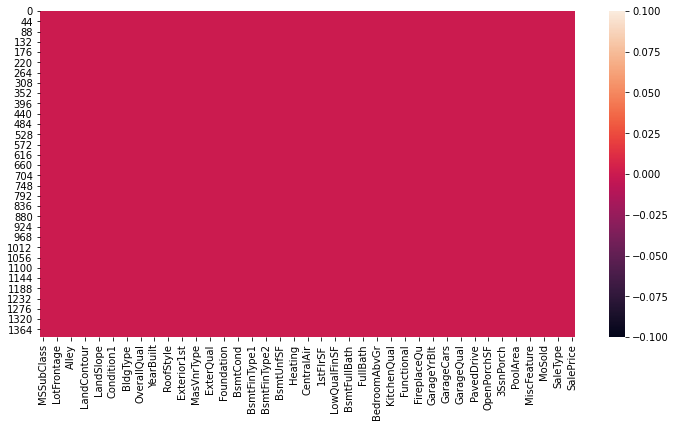

In [101]:
sns.heatmap(df_train.isnull())

## Feature Engineering

#### Remove Multicollinear Feature

Method: [Variance Inflation Factor](https://www.investopedia.com/terms/v/variance-inflation-factor.asp) 

- Method get_highest_vif_feature() will find all the features with [VIF](https://www.investopedia.com/terms/v/variance-inflation-factor.asp) more than threshold value and return the feature with highest VIF

- Instead of removing all the features with VIF more than threshold value we will drop the feature with highest VIF value and recalculate the VIF for all the remaining features.

- We will repeat this step until no remaining features have a VIF larger than threshold value.

- Once we get the final list of multicolenear features we will verify it with Correlation Matrix results and only drop those features, which we are 100% sure wont help in modeling.

In [103]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def get_highest_vif_feature(df, thresh=5):
   
    const = add_constant(df)
    print(f'Shape of data after adding const column: {const.shape}')
    cols = const.columns
      # Calculating VIF for each feature
    vif_df = pd.Series([ (variance_inflation_factor(const.values, i)) for i in range(const.shape[1]) ], index= const.columns).to_frame()
    
    vif_df = vif_df.sort_values(by=0, ascending=False).rename(columns={0: 'VIF'})
    vif_df = vif_df.drop('const')
    vif_df = vif_df[vif_df['VIF'] > thresh]

    if vif_df.empty:
        print('DataFrame is empty!')
        return None
    else:
        print(f'\nFeatures above VIF threshold: {vif_df.to_dict()}')       
        # Feature with hig
        return list(vif_df.index)[0]
        print(f'Lets delete the feature with highest VIF value: {list(vif_df.index)[0]}')
        
# Selecting only numeric features
print(f'Shape of input data: {df_train.shape}')
numeric_feats = df_train.dtypes[df_train.dtypes != "object"].index
print(f"Calculating VIF for {len(numeric_feats)} numerical features")

df_numeric = df_train[numeric_feats]
print(f'Shape of df_numeric: {df_numeric.shape}')
    
feature_to_drop = None
feature_to_drop_list = []
while True:
    feature_to_drop = get_highest_vif_feature(df_numeric, thresh=5)
    print(f'feature_to_drop: {feature_to_drop}')
    if feature_to_drop is None:
        print('No more features to drop!')
        break
    else:
        feature_to_drop_list.append(feature_to_drop)
        df_numeric = df_numeric.drop(feature_to_drop, axis=1)
        print(f'Feature {feature_to_drop} droped from df_numeric')

print(f'\nfeature_to_drop_list: {feature_to_drop_list}')

Shape of input data: (1397, 77)
Calculating VIF for 34 numerical features
Shape of df_numeric: (1397, 34)
Shape of data after adding const column: (1397, 35)

Features above VIF threshold: {'VIF': {'BsmtFinSF2': inf, 'GrLivArea': inf, 'LowQualFinSF': inf, '2ndFlrSF': inf, '1stFlrSF': inf, 'TotalBsmtSF': inf, 'BsmtUnfSF': inf, 'BsmtFinSF1': inf, 'SalePrice': 7.72764345457036, 'GarageCars': 5.455283762659227, 'GarageArea': 5.252862991785788, 'YearBuilt': 5.115591021444534}}
feature_to_drop: BsmtFinSF2
Feature BsmtFinSF2 droped from df_numeric
Shape of data after adding const column: (1397, 34)

Features above VIF threshold: {'VIF': {'GrLivArea': inf, 'LowQualFinSF': inf, '2ndFlrSF': inf, '1stFlrSF': inf, 'TotalBsmtSF': 10.54585292523744, 'BsmtUnfSF': 9.444640545987866, 'BsmtFinSF1': 8.808730520711407, 'SalePrice': 7.72764345457036, 'GarageCars': 5.455283762659227, 'GarageArea': 5.252862991785794, 'YearBuilt': 5.115591021444537}}
feature_to_drop: GrLivArea
Feature GrLivArea droped from df

#### Analysis

- Features correlated with SalePrice are OverallQual(0.79), YearBuilt(0.52), YearRemodAdd(0.51), TotalBsmtSF(0.61), 1stFlrSF(0.61), GrLivArea(0.71), FullBath(0.56), TotRmsAbvGrd(0.53), GarageCars(0.64), GarageArea(0.62)

- Features not correlated with SalePrice are MSSubClass(-0.084), OverallCond(-0.078), BsmtFinSF1(-0.011), LowQualFinSF(-0.026), BsmtHalfBath(-0.017), KitchenAbvGrd(-0.14), EnclosedPorch(-0.13), MiscVal(-0.021), YrSold(-0.029)

- Even though area features are correlated, we dont want to delete them. These features are very usefull to predict the sales price. Infact next during feature engineering we are going to add few more area features by combining existing features.

In [104]:
df_train.shape

(1397, 77)

#### Adding New Features

In [106]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,70.000,8450,None,Reg,Lvl,Inside,Gtl,CollgCr,...,0,0,None,None,0,2,2008,WD,Normal,208500
1,20,RL,59.000,9600,None,Reg,Lvl,FR2,Gtl,Veenker,...,0,0,None,None,0,5,2007,WD,Normal,181500
2,60,RL,70.000,11250,None,IR1,Lvl,Inside,Gtl,CollgCr,...,0,0,None,None,0,9,2008,WD,Normal,223500
3,70,RL,74.000,9550,None,IR1,Lvl,Corner,Gtl,Crawfor,...,0,0,None,None,0,2,2006,WD,Abnorml,140000
4,60,RL,89.500,14260,None,IR1,Lvl,FR2,Gtl,NoRidge,...,0,0,None,None,0,12,2008,WD,Normal,250000


In [108]:
df_train['GarageArea_GarageCars'] = df_train['GarageArea'] * df_train['GarageCars'] + df_train['GarageYrBlt']

df_train['YearBuilt_YearRemodAdd'] = df_train['YearBuilt'] * df_train['YearRemodAdd']

df_train['KitchenQual_ExterQual_BsmtQual'] = df_train['KitchenQual'] + df_train['ExterQual'] + df_train['BsmtQual']
df_train['TotalBathrooms'] = (df_train['FullBath'] + (0.5 * df_train['HalfBath']) +
                               df_train['BsmtFullBath'] + (0.5 * df_train['BsmtHalfBath']))

df_train['TotalPorchSF'] = (df_train['OpenPorchSF'] + df_train['3SsnPorch'] +
                              df_train['EnclosedPorch'] + df_train['ScreenPorch'] +
                              df_train['WoodDeckSF'])

#### Check Informatin Gain

In [111]:
from sklearn.feature_selection import mutual_info_regression

In [112]:
def generate_mi_scores(X, y):
    X = X.copy()
    for col in X.select_dtypes(include = ['object', 'category']):
        X[col], _ = X[col].factorize()
        
    discrete_features = [pd.api.types.is_integer_dtype(col) for col in X.columns]
    mi_scores = mutual_info_regression(X, y, discrete_features = discrete_features, random_state = 0)
    mi_scores = pd.Series(mi_scores, name = 'MI_scores', index = X.columns)
    mi_scores = mi_scores.sort_values(ascending = False)
    return mi_scores


def plot_mi_scores(mi_scores):
    mi_scores = mi_scores.sort_values(ascending=True)
    width = np.arange(len(mi_scores))
    tick_labels = list(mi_scores.index)
    plt.barh(width, mi_scores, color = 'blue')
    plt.yticks(width, tick_labels)
    plt.show()

In [113]:
mi_scores = generate_mi_scores(df_train.drop('SalePrice', axis = 1), df_train.SalePrice)

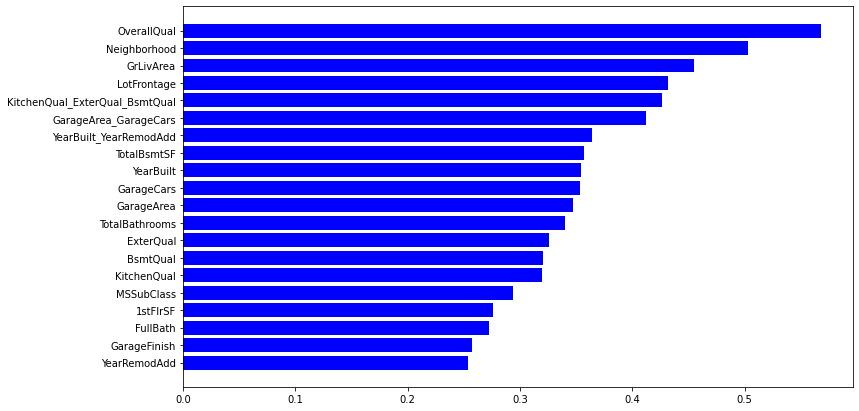

In [114]:
plt.figure(figsize = (12, 7))
plot_mi_scores(mi_scores[:20])